In [2]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

In [1]:
readability = [4,5,4,5,2,5,4,5,4,5,2,4,5,4,3,2,3,5,3,5,4,5,4,5,5,5,5,5,2,5,2,5]
medical_coherence = [5,5,4,4,3,5,4,5,4,4,3,2,4,2,2,2,4,3,3,5,5,5,4,5,5,4,5,5,4,4,2,5]

/tmp/ipykernel_1346377/2731005024.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


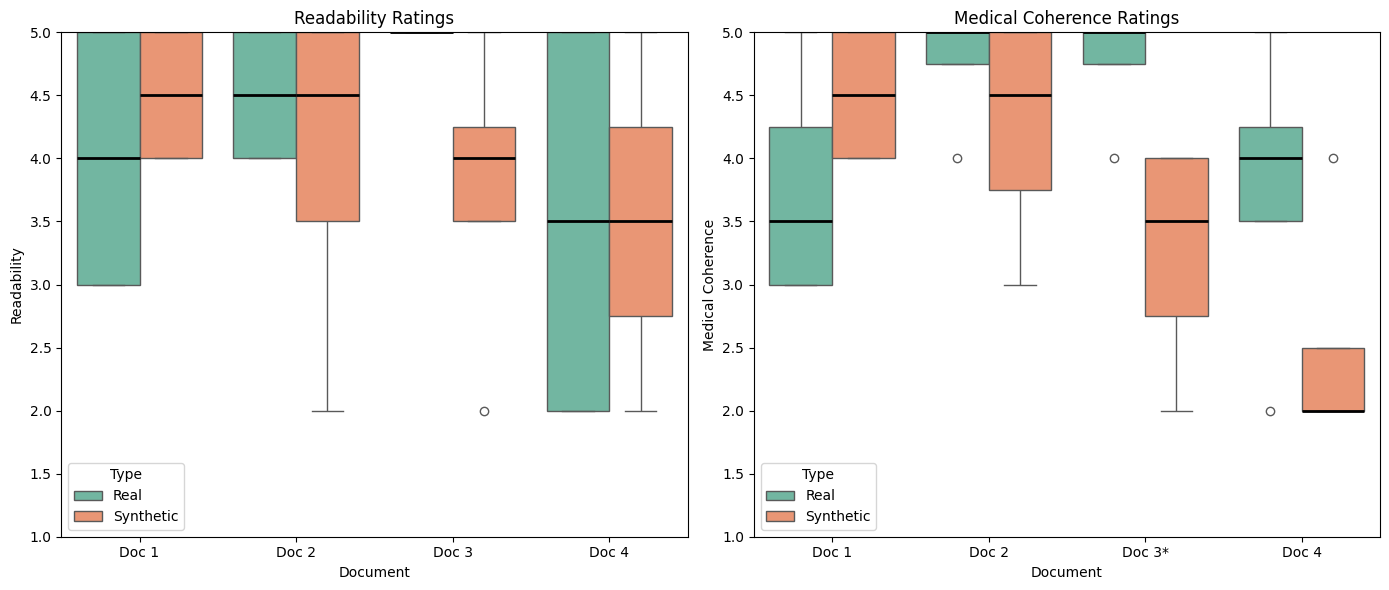

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Data
read_synthetic = [[4,5,4,5], [2,5,4,5], [4,5,2,4], [5,4,3,2]]
read_real = [[3,5,3,5], [4,5,4,5], [5,5,5,5], [2,5,2,5]]
mc_synthetic = [[5,5,4,4], [3,5,4,5], [4,4,3,2], [4,2,2,2]]
mc_real = [[4,3,3,5], [5,5,4,5], [5,4,5,5], [4,4,2,5]]

# Create DataFrames for Readability and Medical Coherence
data_read = {
    'Document': ['Doc 1'] * len(read_real[0]) + ['Doc 2'] * len(read_real[1]) + 
                ['Doc 3'] * len(read_real[2]) + ['Doc 4'] * len(read_real[3]) + 
                ['Doc 1'] * len(read_synthetic[0]) + ['Doc 2'] * len(read_synthetic[1]) + 
                ['Doc 3'] * len(read_synthetic[2]) + ['Doc 4'] * len(read_synthetic[3]),
    'Type': ['Real'] * sum(len(doc) for doc in read_real) + ['Synthetic'] * sum(len(doc) for doc in read_synthetic),
    'Readability': sum(read_real, []) + sum(read_synthetic, [])
}

data_mc = {
    'Document': ['Doc 1'] * len(mc_real[0]) + ['Doc 2'] * len(mc_real[1]) + 
                ['Doc 3'] * len(mc_real[2]) + ['Doc 4'] * len(mc_real[3]) + 
                ['Doc 1'] * len(mc_synthetic[0]) + ['Doc 2'] * len(mc_synthetic[1]) + 
                ['Doc 3'] * len(mc_synthetic[2]) + ['Doc 4'] * len(mc_synthetic[3]),
    'Type': ['Real'] * sum(len(doc) for doc in mc_real) + ['Synthetic'] * sum(len(doc) for doc in mc_synthetic),
    'Medical Coherence': sum(mc_real, []) + sum(mc_synthetic, [])
}

df_read = pd.DataFrame(data_read)
df_mc = pd.DataFrame(data_mc)

# Plotting
plt.figure(figsize=(14, 6))

# Box plot for Readability
plt.subplot(1, 2, 1)
sns.boxplot(x='Document', y='Readability', hue='Type', data=df_read, palette="Set2", 
            medianprops=dict(color="black", linewidth=2))
plt.title("Readability Ratings")
plt.xlabel("Document")
plt.ylabel("Readability")
plt.ylim(1, 5) 
plt.legend(title='Type')

# Box plot for Medical Coherence
plt.subplot(1, 2, 2)
sns.boxplot(x='Document', y='Medical Coherence', hue='Type', data=df_mc, palette="Set2", 
            medianprops=dict(color="black", linewidth=2))
plt.title("Medical Coherence Ratings")
plt.xlabel("Document")
plt.ylabel("Medical Coherence")
plt.ylim(1, 5) 
plt.legend(title='Type')

# Add a star to "Doc 3" label
ax = plt.gca()  # Get the current axis
xticklabels = ax.get_xticklabels()  # Get current tick labels
new_labels = [label.get_text() + "*" if label.get_text() == "Doc 3" else label.get_text() for label in xticklabels]
ax.set_xticklabels(new_labels)

plt.tight_layout()
plt.savefig("study_swed_docs.png")
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data
read_synthetic = [[4,5,4,5], [2,5,4,5], [4,5,2,4], [5,4,3,2]]
read_real = [[3,5,3,5], [4,5,4,5], [5,5,5,5], [2,5,2,5]]
mc_synthetic = [[5,5,4,4], [3,5,4,5], [4,4,3,2], [4,2,2,2]]
mc_real = [[4,3,3,5], [5,5,4,5], [5,4,5,5], [4,4,2,5]]

# Prepare data for boxplots
read_data = [np.concatenate((read_real[i], read_synthetic[i])) for i in range(4)]
mc_data = [np.concatenate((mc_real[i], mc_synthetic[i])) for i in range(4)]

# Perform t-tests for each document and category
results = {}

# Readability
for i in range(4):  # For each document
    t_stat, p_value = stats.ttest_ind(read_real[i], read_synthetic[i])
    results[f'Readability Doc {i+1}'] = {'t-statistic': t_stat, 'p-value': p_value}

# Medical Coherence
for i in range(4):  # For each document
    t_stat, p_value = stats.ttest_ind(mc_real[i], mc_synthetic[i])
    results[f'Medical Coherence Doc {i+1}'] = {'t-statistic': t_stat, 'p-value': p_value}
results
# Display results

{'Readability Doc 1': {'t-statistic': -0.7745966692414834,
  'p-value': 0.4679944457243592},
 'Readability Doc 2': {'t-statistic': 0.6546536707079771,
  'p-value': 0.5369633243867579},
 'Readability Doc 3': {'t-statistic': 1.9867985355975657,
  'p-value': 0.09413276656581646},
 'Readability Doc 4': {'t-statistic': 0.0, 'p-value': 1.0},
 'Medical Coherence Doc 1': {'t-statistic': -1.3416407864998738,
  'p-value': 0.22825809896897356},
 'Medical Coherence Doc 2': {'t-statistic': 0.9258200997725514,
  'p-value': 0.39025850801980316},
 'Medical Coherence Doc 3': {'t-statistic': 2.7774602993176543,
  'p-value': 0.03210449218749999},
 'Medical Coherence Doc 4': {'t-statistic': 1.5554275420956378,
  'p-value': 0.1708443980966124}}

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import cohen_kappa_score

# Data Setup
read_synthetic = [[4,5,4,5], [2,5,4,5], [4,5,2,4], [5,4,3,2]]
read_real = [[3,5,3,5], [4,5,4,5], [5,5,5,5], [2,5,2,5]]
mc_synthetic = [[5,5,4,4], [3,5,4,5], [4,4,3,2], [4,2,2,2]]
mc_real = [[4,3,3,5], [5,5,4,5], [5,4,5,5], [4,4,2,5]]

# Flatten arrays
read_synthetic_flat = np.concatenate(read_synthetic)
read_real_flat = np.concatenate(read_real)
mc_synthetic_flat = np.concatenate(mc_synthetic)
mc_real_flat = np.concatenate(mc_real)

# Significance Test - Independent T-Test for each feature (assuming normality for simplicity)
t_read, p_read = ttest_ind(read_synthetic_flat, read_real_flat, equal_var=False)
t_mc, p_mc = ttest_ind(mc_synthetic_flat, mc_real_flat, equal_var=False)

# Data for Descriptive Statistics
data = pd.DataFrame({
    'Readability': np.concatenate([read_synthetic_flat, read_real_flat]),
    'Medical Coherence': np.concatenate([mc_synthetic_flat, mc_real_flat]),
    'Type': ['Synthetic'] * len(read_synthetic_flat) + ['Real'] * len(read_real_flat)
})

means = data.groupby('Type').mean()
stds = data.groupby('Type').std()

# Inter-annotator agreement with Cohen's Kappa
kappas_read = [cohen_kappa_score(read_synthetic[i], read_real[i]) for i in range(4)]
kappas_mc = [cohen_kappa_score(mc_synthetic[i], mc_real[i]) for i in range(4)]
mean_kappa_read = np.mean(kappas_read)
mean_kappa_mc = np.mean(kappas_mc)

# Output Descriptive Statistics, Kappa Scores, and T-Test Results
print("Mean Ratings:\n", means)
print("\nStandard Deviations:\n", stds)
print("\nMean Cohen's Kappa for Readability:", mean_kappa_read)
print("Mean Cohen's Kappa for Medical Coherence:", mean_kappa_mc)
print("\nT-Test for Readability: t =", t_read, ", p =", p_read)
print("T-Test for Medical Coherence: t =", t_mc, ", p =", p_mc)

Mean Ratings:
            Readability  Medical Coherence
Type                                     
Real            4.2500              4.250
Synthetic       3.9375              3.625

Standard Deviations:
            Readability  Medical Coherence
Type                                     
Real          1.125463           0.930949
Synthetic     1.123610           1.147461

Mean Cohen's Kappa for Readability: 0.15000000000000002
Mean Cohen's Kappa for Medical Coherence: 0.15945165945165948

T-Test for Readability: t = -0.785997723753888 , p = 0.4380333465160603
T-Test for Medical Coherence: t = -1.6919206304810306 , p = 0.10146358174707457


Mean Ratings:
            Readability  Medical Coherence
Type                                     
Real            4.2500              4.250
Synthetic       3.9375              3.625

Standard Deviations:
            Readability  Medical Coherence
Type                                     
Real          1.125463           0.930949
Synthetic     1.123610           1.147461

Mean Cohen's Kappa for Readability: 0.15000000000000002
Mean Cohen's Kappa for Medical Coherence: 0.15945165945165948


/tmp/ipykernel_1346377/759942886.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Readability', data=data, palette="Set2", medianprops=dict(color="black", linewidth=2))
/tmp/ipykernel_1346377/759942886.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Medical Coherence', data=data, palette="Set2", medianprops=dict(color="black", linewidth=2))


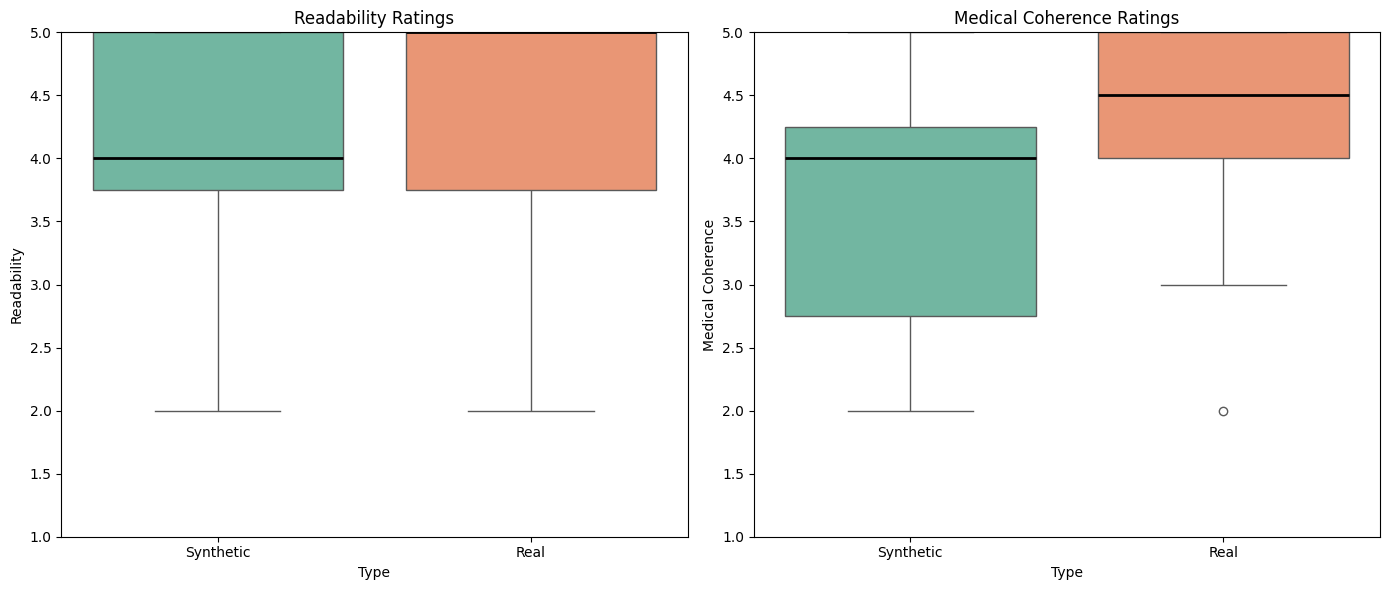

In [26]:
# Ratings data for readability and medical coherence for synthetic and real records
read_synthetic = [[4,5,4,5], [2,5,4,5], [4,5,2,4], [5,4,3,2]]
read_real = [[3,5,3,5], [4,5,4,5], [5,5,5,5], [2,5,2,5]]
mc_synthetic = [[5,5,4,4], [3,5,4,5], [4,4,3,2], [4,2,2,2]]
mc_real = [[4,3,3,5], [5,5,4,5], [5,4,5,5], [4,4,2,5]]

# Flatten and combine ratings into categories for ease of analysis
read_synthetic_flat = np.concatenate(read_synthetic)
read_real_flat = np.concatenate(read_real)
mc_synthetic_flat = np.concatenate(mc_synthetic)
mc_real_flat = np.concatenate(mc_real)

# Create DataFrame for analysis
data = pd.DataFrame({
    'Readability': np.concatenate([read_synthetic_flat, read_real_flat]),
    'Medical Coherence': np.concatenate([mc_synthetic_flat, mc_real_flat]),
    'Type': ['Synthetic'] * len(read_synthetic_flat) + ['Real'] * len(read_real_flat)
})

# Mean and Standard Deviation calculations
means = data.groupby('Type').mean()
stds = data.groupby('Type').std()

# Cohen's Kappa for Inter-annotator agreement (pairwise)
kappas_read = [cohen_kappa_score(read_synthetic[i], read_real[i]) for i in range(4)]
kappas_mc = [cohen_kappa_score(mc_synthetic[i], mc_real[i]) for i in range(4)]
mean_kappa_read = np.mean(kappas_read)
mean_kappa_mc = np.mean(kappas_mc)

# Display Descriptive Statistics and Inter-Rater Agreement
print("Mean Ratings:\n", means)
print("\nStandard Deviations:\n", stds)
print("\nMean Cohen's Kappa for Readability:", mean_kappa_read)
print("Mean Cohen's Kappa for Medical Coherence:", mean_kappa_mc)

# Plotting
plt.figure(figsize=(14, 6))

# Box plot for Readability and Medical Coherence
plt.subplot(1, 2, 1)
sns.boxplot(x='Type', y='Readability', data=data, palette="Set2", medianprops=dict(color="black", linewidth=2))
#sns.boxplot(x='Type', y='Readability', data=data, palette={'Real': 'blue', 'Synthetic': 'green'}palette="Set2")
plt.title("Readability Ratings")
plt.ylim(1, 5)

plt.subplot(1, 2, 2)
sns.boxplot(x='Type', y='Medical Coherence', data=data, palette="Set2", medianprops=dict(color="black", linewidth=2))
plt.title("Medical Coherence Ratings")
plt.ylim(1, 5)

plt.tight_layout()
plt.savefig("study_swed_all.png")


In [13]:
import numpy as np
from scipy.stats import pearsonr

# Define the ratings for readability and medical coherence
read_synthetic = [[4,5,4,5], [2,5,4,5], [4,5,2,4], [5,4,3,2]]
read_real = [[3,5,3,5], [4,5,4,5], [5,5,5,5], [2,5,2,5]]
mc_synthetic = [[5,5,4,4], [3,5,4,5], [4,4,3,2], [4,2,2,2]]
mc_real = [[4,3,3,5], [5,5,4,5], [5,4,5,5], [4,4,2,5]]

# Flatten the lists to combine ratings from all documents
flat_read_synthetic = [rating for sublist in read_synthetic for rating in sublist]
flat_read_real = [rating for sublist in read_real for rating in sublist]
flat_mc_synthetic = [rating for sublist in mc_synthetic for rating in sublist]
flat_mc_real = [rating for sublist in mc_real for rating in sublist]

# Combine all readability and medical coherence ratings
all_readability = flat_read_synthetic + flat_read_real
all_coherence = flat_mc_synthetic + flat_mc_real

# Calculate Pearson correlation and significance
overall_corr, overall_p_value = pearsonr(all_readability, all_coherence)

# Display results
print(f"Overall Correlation: {overall_corr:.3f}, p-value: {overall_p_value:.3f}")

Overall Correlation: 0.649, p-value: 0.000


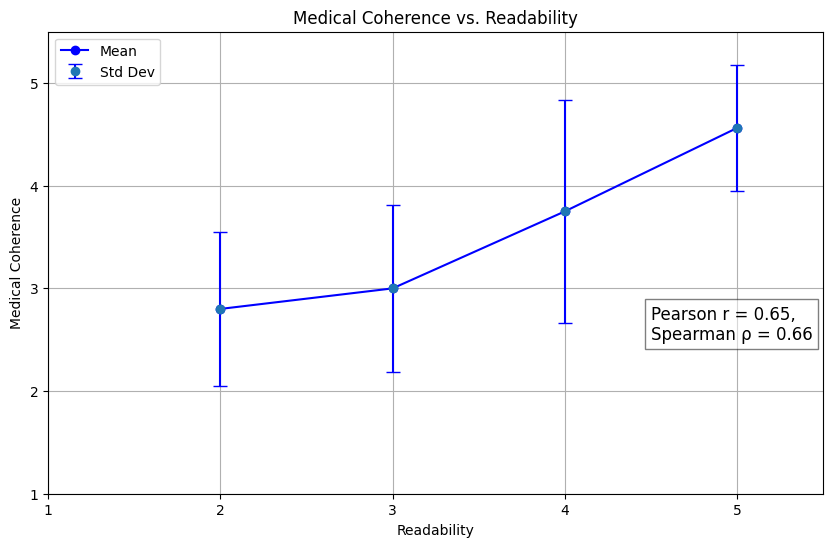

Pearson Correlation Coefficient: 0.6489845582758333
Pearson P-value: 5.869493782836796e-05
Spearman Correlation Coefficient: 0.6576114046892763
Spearman P-value: 4.319799631383822e-05


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from collections import defaultdict

# Calculate Pearson and Spearman correlation coefficients
pearson_coefficient, pearson_p_value = pearsonr(readability, medical_coherence)
spearman_coefficient, spearman_p_value = spearmanr(readability, medical_coherence)

# Calculate correlation coefficients
pearson_corr, pearson_p = pearsonr(readability, medical_coherence)
spearman_corr, spearman_p = spearmanr(readability, medical_coherence)

# Compute mean and standard deviation for medical coherence at each readability level
data_dict = defaultdict(list)
for r, m in zip(readability, medical_coherence):
    data_dict[r].append(m)

means = []
std_devs = []
unique_readabilities = sorted(data_dict.keys())

for r in unique_readabilities:
    values = data_dict[r]
    means.append(np.mean(values))
    std_devs.append(np.std(values))

# Plot the data
plt.figure(figsize=(10, 6))
# Plot the mean values as a line
plt.plot(unique_readabilities, means, marker='o', linestyle='-', color='blue', label='Mean')
# Add standard deviation as error bars
plt.errorbar(unique_readabilities, means, yerr=std_devs, fmt='o', ecolor='blue', capsize=5, linestyle='None', label='Std Dev')
plt.title('Medical Coherence vs. Readability')
plt.xlabel('Readability')
plt.ylabel('Medical Coherence')
plt.xlim(1, 5.5)
plt.ylim(1, 5.5)
plt.xticks(range(1, 6))  # Set x-axis ticks to whole integers 1 to 5
plt.yticks(range(1, 6))  # Set y-axis ticks to whole integers 1 to 5
plt.grid(True)
plt.legend()

# Show correlation coefficients in the plot
plt.text(4.5, 2.5, f'Pearson r = {pearson_corr:.2f}, \nSpearman ρ = {spearman_corr:.2f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("study_correlation_swed.png")
plt.show()

# Output the correlation results
print(f'Pearson Correlation Coefficient: {pearson_corr}')
print(f'Pearson P-value: {pearson_p}')
print(f'Spearman Correlation Coefficient: {spearman_corr}')
print(f'Spearman P-value: {spearman_p}')

In [28]:
read_s = [4,5,4,5,2,5,4,5,4,5,2,4,5,4,3,2]
read_r = [3,5,3,5,4,5,4,5,5,5,5,5,2,5,2,5]
mc_s = [5,5,4,4,3,5,4,5, 4,4,3,2,4,2,2,2]
mc_r= [4,3,3,5,5,5,4,5,5,4,5,5,4,4,2,5]


In [29]:
mean_rr = statistics.mean(read_r)
mean_rs = statistics.mean(read_s)
mean_mr = statistics.mean(mc_r)
mean_ms = statistics.mean(mc_s)

median_rr = statistics.median(read_r)
median_rs = statistics.median(read_s)
median_mr = statistics.median(mc_r)
median_ms = statistics.median(mc_s)

sd_rr = statistics.stdev(read_r)
sd_rs = statistics.stdev(read_s)
sd_mr = statistics.stdev(mc_r)
sd_ms = statistics.stdev(mc_s)

print(mean_rr, mean_rs, mean_mr, mean_ms)
print(median_rr, median_rs, median_mr, median_ms)

4.25 3.9375 4.25 3.625
5.0 4.0 4.5 4.0
